# Viral Identification

In [43]:
import glob, os

# import necessary modules
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Create a list of colors
cmap1=LinearSegmentedColormap.from_list("my_colormap", sns.color_palette("colorblind", n_colors=5))


sns.set_style("ticks",{'axes.grid' : True})
sns.set_palette("colorblind")


plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["xtick.major.width"] = 1.5
plt.rcParams["ytick.major.width"] = 1.5
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["axes.titlepad"] = 20

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["axes.titlesize"] = 30
plt.rcParams['axes.labelsize'] = 23.5
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["savefig.dpi"]=300

In [ ]:
input_viral_sequences=snakemake.input.viral_sequences
input_assembled_sequences=snakemake.input.assembled_sequences

SAMPLES=list(snakemake.params.samples)
contig_dir=snakemake.params.contig_dir
viral_dir=snakemake.params.viral_dir
SUBASSEMBLY=snakemake.params.subassembly
CROSS_ASSEMBLY=snakemake.params.cross_assembly

#-------------------------------------------------------------------------------------------
output_viral_sequences_count_plot_png=snakemake.output.viral_sequences_count_plot_png
output_viral_sequences_count_plot_svg=snakemake.output.viral_sequences_count_plot_svg
output_viral_sequences_count_table_html=snakemake.output.viral_sequences_count_table_html
output_viral_sequences_length_plot_png=snakemake.output.viral_sequences_length_plot_png
output_viral_sequences_length_plot_svg=snakemake.output.viral_sequences_length_plot_svg
output_viral_sequences_length_table_html=snakemake.output.viral_sequences_length_table_html


In [53]:
workdir="/home/lmf/MOSAIC/ORGANIC/"
contig_dir = workdir + "03_CONTIGS/"
viral_dir= workdir + "04_VIRAL_ID/"

## Number of viral contigs

In [54]:
# Create an empty DataFrame to store the samples data
df_samples = pd.DataFrame()

# Initialize empty lists for storing sample names, file names, and lengths
names = []
files = []
lengths = []

# Initialize empty lists for storing positive viral contig names and their corresponding labels
names_p = []
positive = []

# Iterate over files in the working directory
for file in glob.glob(contig_dir + "*tot.fasta"):
    # Exclude files containing "racon", "medaka", or "contigs"
    if "racon" not in file and "medaka" not in file and "contigs" not in file:
        # Process files from "spades"
        if "spades" in file:
            # Iterate over records in the fasta file
            for record in SeqIO.parse(file, "fasta"):
                # Append the modified record ID, sample name, file name, and contig length to their respective lists
                names.append(record.id.replace("=", "_"))
                sample = file.split("/")[-1].split("_spades")[0]
                files.append(file.split("/")[-1].split("_filtered")[0])
                lengths.append(len(record.seq) / 1000000)
        else:
            # Process files not from "spades"
            for record in SeqIO.parse(file, "fasta"):
                # Append the modified record ID, sample name, file name, and contig length to their respective lists
                names.append(record.id.replace("=", "_"))
                sample = file.split("/")[-1].split("_corrected")[0]
                files.append(file.split("/")[-1].split("_corrected")[0])
                lengths.append(len(record.seq) / 1000000)

        # Construct the positive viral contig file name based on the sample name
        positive_file = viral_dir + sample + "_positive_viral_contigs.tot.fasta"
        
        # Iterate over records in the positive viral contig file
        for record in SeqIO.parse(positive_file, "fasta"):
            # Append the modified record ID (without "_provirus" suffix) and label "positive" to their respective lists
            names_p.append(record.id.replace("=", "_").split("_provirus")[0])
            positive.append("positive")

# Assign the lists to the corresponding columns in the df_samples DataFrame
df_samples["names"] = names
df_samples["files"] = files
df_samples["lengths"] = lengths

# Create a new DataFrame for positive viral contigs data
df_positive = pd.DataFrame()
df_positive["names"] = names_p
df_positive["positive"] = positive

# Merge the df_samples and df_positive DataFrames on the "names" column
df_samples = df_samples.merge(df_positive, left_on="names", right_on="names", how="outer")

# Fill missing values in the "positive" column with the label "negative"
df_samples['positive'] = df_samples['positive'].fillna("negative")

# Return the updated df_samples DataFrame
df_samples


,names,files,lengths,positive
0,Vir_3_2_3_NODE_1_length_51278_cov_10.533979,Vir_3_2_3_spades,0.051278,positive
1,Vir_3_2_3_NODE_2_length_48290_cov_22.769980,Vir_3_2_3_spades,0.048290,positive
2,Vir_3_2_3_NODE_3_length_47244_cov_14.071182,Vir_3_2_3_spades,0.047244,positive
3,Vir_3_2_3_NODE_4_length_46364_cov_13.815954,Vir_3_2_3_spades,0.046364,positive
4,Vir_3_2_3_NODE_5_length_44922_cov_9.603651,Vir_3_2_3_spades,0.044922,positive
...,...,...,...,...
135100,Vir_3_1_3_NODE_3788_length_1000_cov_3.382011,Vir_3_1_3_spades,0.001000,positive
135101,Vir_3_1_3_NODE_3789_length_1000_cov_2.993651,Vir_3_1_3_spades,0.001000,positive
135102,Vir_3_1_3_NODE_3790_length_1000_cov_2.787302,Vir_3_1_3_spades,0.001000,positive
135103,Vir_3_1_3_NODE_3791_length_1000_cov_2.566138,Vir_3_1_3_spades,0.001000,positive


NameError: name 'output_viral_sequences_count_plot_png' is not defined

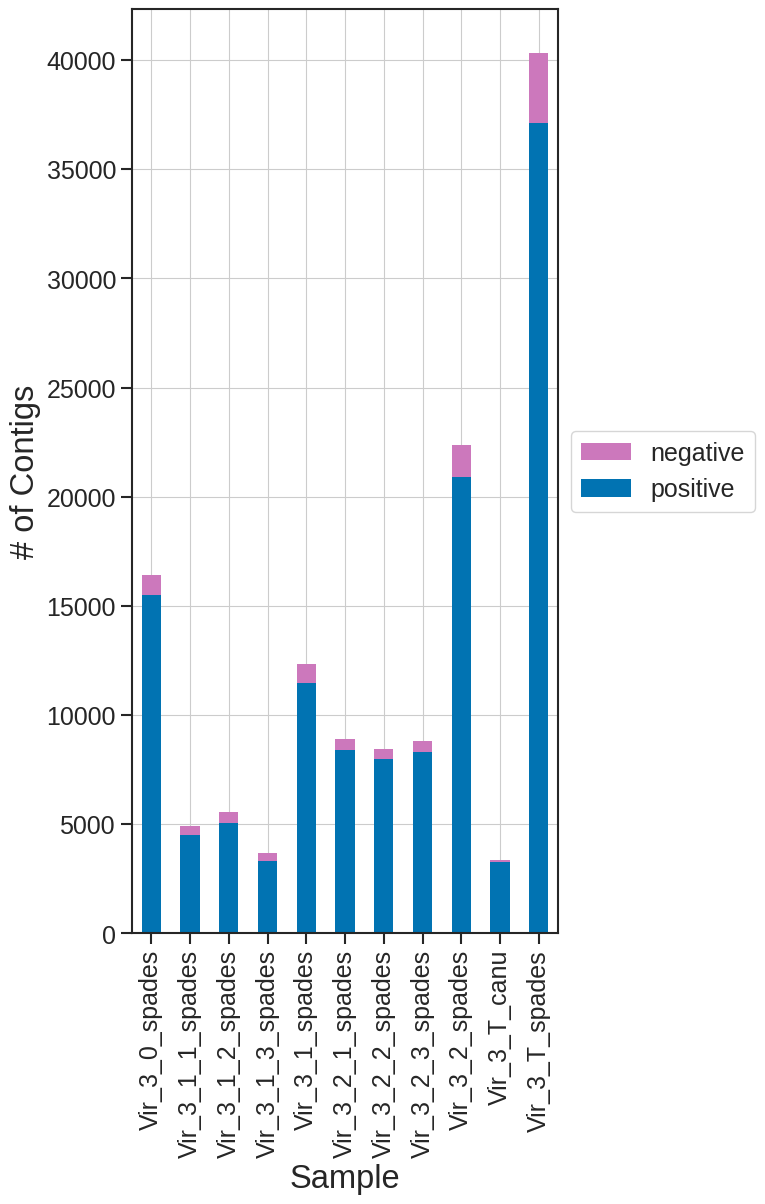

In [51]:
# Group the df_samples DataFrame by "names" and "positive" columns,
# keep the first record for each group, and reset the index
df = df_samples.groupby(["names", "positive"]).first().reset_index()

# Group the resulting DataFrame by "files" and "positive" columns,
# calculate the size of each group, and reset the index with a new column "Count"
df = df.groupby(["files", "positive"]).size().reset_index(name='Count')

# Create a pivot table using the "Count" column as values,
# "positive" column as columns, and "files" column as index.
# The missing values are filled with 0.
df_pivot = pd.pivot_table(df, values='Count', columns=['positive'], index="files",
                     aggfunc=np.sum, fill_value=0)

# Calculate the desired figure width based on the number of columns in df_pivot
fig_width = 0.5 * len(df_pivot)

# Create a bar plot with stacked bars for the "positive" and "negative" columns in df_pivot,
# set the figure size using the calculated width, and customize the appearance
ax = df_pivot[["positive", "negative"]].plot(kind='bar', stacked=True, figsize=(fig_width, 12), edgecolor='none', colormap=cmap1)

# Set the x-axis label and y-axis label
ax.set_xlabel("Sample")
ax.set_ylabel("# of Contigs")

# Add a legend to the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure as png and svg
ax.figure.savefig(output_viral_sequences_count_plot_png, format="png", bbox_inches = "tight",transparent=True)
ax.figure.savefig(output_viral_sequences_count_plot_svg, format="svg", bbox_inches = "tight",transparent=True)


## Number of viral bases

In [50]:
# Dataframe with number contigs per viral category
df_pivot["total"]=df_pivot["positive"]+df_pivot["negative"]
df_pivot["f_positive"]=round((df_pivot["positive"]/df_pivot["total"])*100,1)
df_pivot["f_negative"]=round((df_pivot["negative"]/df_pivot["total"])*100,1)

# sort the DataFrame by "Sample" column, apply background color gradient to it, and render it as an HTML table
df_pivot_out=df_pivot.style.background_gradient(cmap="RdYlGn", vmin=0).render()

# write the HTML table to a file
with open(output_viral_sequences_count_table_html,"w") as fp:
    fp.write(df_pivot_out)
    
# show the dataframe wand apply background color gradient
df_pivot.style.background_gradient(cmap="RdYlGn", vmin=0)


NameError: name 'output_viral_sequences_count_table_html' is not defined

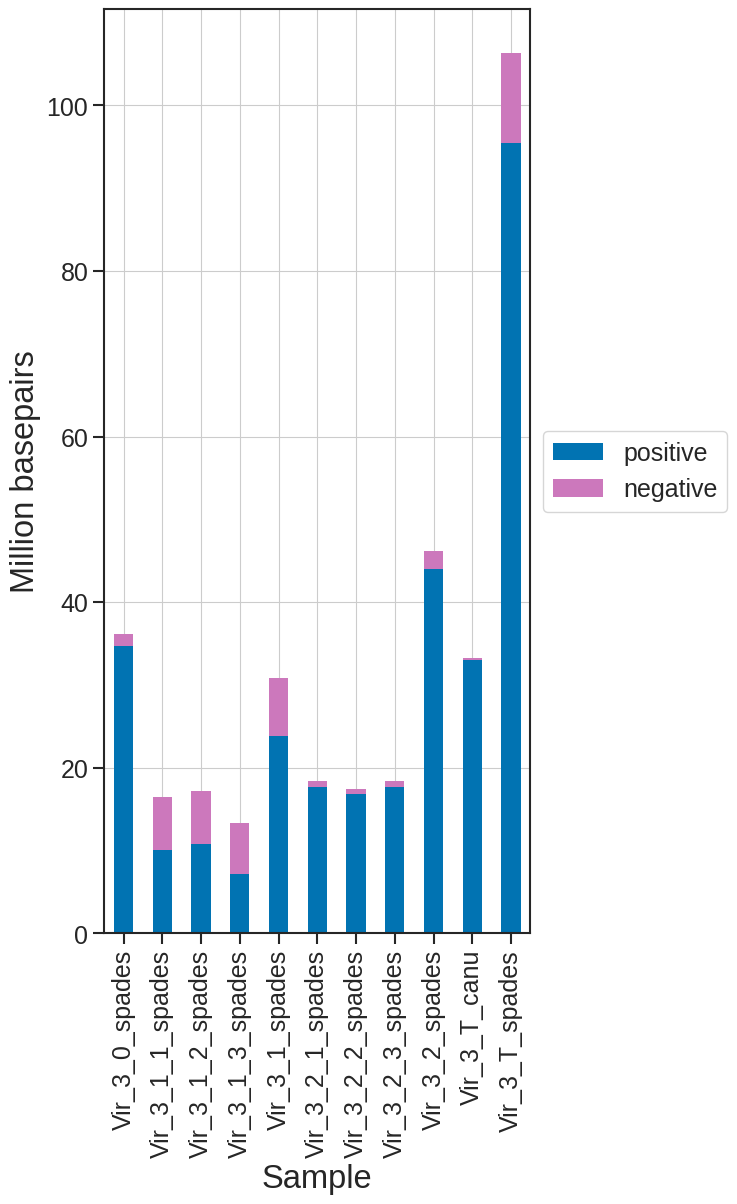

In [48]:
# Group the df_samples DataFrame by "files" and "positive" columns and calculate the sum of other columns
df = df_samples.groupby(["files", "positive"]).sum()

# Create a pivot table from the df DataFrame, with values as 'lengths', columns as 'positive', and index as 'files'
df_Mbp = pd.pivot_table(df, values='lengths', columns=['positive'], index="files", aggfunc=np.sum, fill_value=0)

# Calculate the figure width based on the number of columns in df_Mbp
fig_width = 0.5 * len(df_Mbp)

# Create a bar plot with stacked bars using df_Mbp, set the colormap, figure size, edgecolor, and transparency
ax = df_Mbp[["positive", "negative"]].plot(kind='bar', stacked=True, colormap=cmap1, figsize=(fig_width, 12), edgecolor='none')

# Set the x-label and y-label of the plot
ax.set_xlabel("Sample")
ax.set_ylabel("Million basepairs")

# Add a legend to the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure as PNG and SVG files with specified output paths, and adjust the bounding box and transparency
ax.figure.savefig(output_viral_sequences_length_plot_png, format="png", bbox_inches="tight", transparent=True)
ax.figure.savefig(output_viral_sequences_length_plot_svg, format="svg", bbox_inches="tight", transparent=True)


In [49]:
# Add a new column "total" to df_Mbp, which is the sum of "positive" and "negative" columns
df_Mbp["total"] = df_Mbp["positive"] + df_Mbp["negative"]

# Calculate the percentage of positive contigs and add a new column "f_positive" to df_Mbp
df_Mbp["f_positive"] = round((df_Mbp["positive"] / df_Mbp["total"]) * 100, 1)

# Calculate the percentage of negative contigs and add a new column "f_negative" to df_Mbp
df_Mbp["f_negative"] = round((df_Mbp["negative"] / df_Mbp["total"]) * 100, 1)

# Apply a background gradient to the DataFrame using the "RdYlGn" colormap and set the minimum value to 0
df_Mbp.style.background_gradient(cmap="RdYlGn", vmin=0)

# Render the styled DataFrame to an HTML representation
df_Mbp_out = df_Mbp.style.background_gradient(cmap="RdYlGn", vmin=0).render()

# Write the HTML representation of the styled DataFrame to a file
with open(output_viral_sequences_length_table_html, "w") as fp:
    fp.write(df_Mbp_out)

positive,negative,positive,total,f_positive,f_negative
files,,,,,
Vir_3_0_spades,1.377468,34.735557,36.113025,96.200000,3.800000
Vir_3_1_1_spades,6.349660,10.116679,16.466339,61.400000,38.600000
Vir_3_1_2_spades,6.416269,10.765641,17.181910,62.700000,37.300000
Vir_3_1_3_spades,6.221614,7.155228,13.376842,53.500000,46.500000
Vir_3_1_spades,6.987575,23.817654,30.805229,77.300000,22.700000
Vir_3_2_1_spades,0.731022,17.707627,18.438649,96.000000,4.000000
Vir_3_2_2_spades,0.677626,16.798645,17.476271,96.100000,3.900000
Vir_3_2_3_spades,0.704954,17.690419,18.395373,96.200000,3.800000
Vir_3_2_spades,2.185350,44.022624,46.207974,95.300000,4.700000
